In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
time_stamp = pd.Timestamp(datetime(2018,1,1))
time_stamp

Timestamp('2018-01-01 00:00:00')

note: the value of timestamp is known as string

In [5]:
pd.Timestamp("2018-01-01")== time_stamp

True

Getting attribute

In [6]:
time_stamp.year

2018

In [7]:
time_stamp.weekday_name

'Monday'

Getting period & frequency

In [9]:
period = pd.Period("2018-01")
period

Period('2018-01', 'M')

In [10]:
period.asfreq("D")

Period('2018-01-31', 'D')

Convert period to frequency and revert

In [11]:
period.to_timestamp().to_period('M')

Period('2018-01', 'M')

In [12]:
period+2

Period('2018-03', 'M')

In [14]:
# adding to timestamp
pd.Timestamp('2017-01-31','M') +1

Timestamp('2017-02-28 00:00:00', freq='M')

** Generating sequence of date time:** pd.date_range(start,end,periods, freq)

In [15]:
index = pd.date_range(start='2018-1-1',periods=12,freq='M')
index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [16]:
index[0]

Timestamp('2018-01-31 00:00:00', freq='M')

** Pd.DateImeIndex **: sequence of Timestamp objects with frequence info

In [17]:
index.to_period()

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12'],
            dtype='period[M]', freq='M')

## Create a time series

In [21]:
pd.DataFrame({'data':index}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 1 columns):
data    12 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 176.0 bytes


In [31]:
# generate random numbers of 0,1 in 12 rows and 2 columns 
data = np.random.random(size=(12,2))

In [36]:
pd.DataFrame(data=data, index=index).head()

,0,1
2018-01-31,0.803080,0.123705
2018-02-28,0.125534,0.960542
2018-03-31,0.528113,0.979136
2018-04-30,0.041278,0.403348
2018-05-31,0.074844,0.630824


In [37]:
## Create a week of data 
seven_days = pd.date_range(start='2018-01-01',periods=7)
for day in seven_days:
    print(day.dayofweek,day.weekday_name)

0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday
6 Sunday


** Google stock **

In [49]:
google = pd.read_csv('C:/Dataset/stock_data/google.csv')
google.head()

,Date,Close
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [58]:
google.rename(columns={'Close':'price'},inplace=True)
google.head()

,Date,price
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


In [59]:
google.head()

,Date,price
0,2014-01-02,556.00
1,2014-01-03,551.95
2,2014-01-04,NaN
3,2014-01-05,NaN
4,2014-01-06,558.10


** Convert string dates into datetime64 **

In [60]:
google.date = pd.to_datetime(google.Date)

In [61]:
google.set_index('Date',inplace=True)

In [62]:
google.head()

,price
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


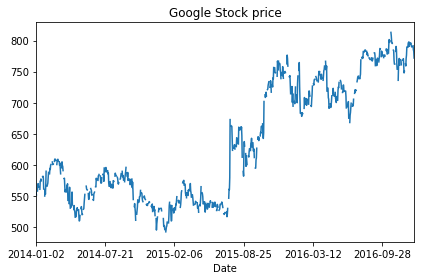

In [66]:
google.price.plot(title='Google Stock price')
plt.tight_layout(); plt.show()

## Partial string indexing

In [70]:
google['2015-3':'2016-2']  # include the last month

,price
Date,
2016-01-01,NaN
2016-01-02,NaN
2016-01-03,NaN
2016-01-04,741.84
2016-01-05,742.58
2016-01-06,743.62
2016-01-07,726.39
2016-01-08,714.47
2016-01-09,NaN


In [73]:
google.loc['2016-06-01','price']

734.14999999999998

## Set frequency

In [78]:
# as.freq('D') convert DateTimeIndex into calendar day frquency
google.asfreq('D').head()

,price
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [79]:
# as.freq('B') cnonvert DateTimeIndex to business day frequency
google = google.asfreq('B')

In [80]:
google.head()

,price
Date,
2014-01-02,NaN
2014-01-03,NaN
2014-01-06,NaN
2014-01-07,NaN
2014-01-08,NaN


In [83]:
## Working on air quality data as time series
df = pd.read_csv("C:/dataset/air_quality/ozone_nyla.csv")
df.head()

,date,Los Angeles,New York
0,2000-01-01,0.008375,0.004032
1,2000-01-02,NaN,0.009486
2,2000-01-03,NaN,0.005580
3,2000-01-04,0.005500,0.008717
4,2000-01-05,0.005000,0.013754


In [84]:
df.date=pd.to_datetime(df.date)

In [85]:
# Set date column as index
df.set_index('date',inplace=True)

# Inspect data 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


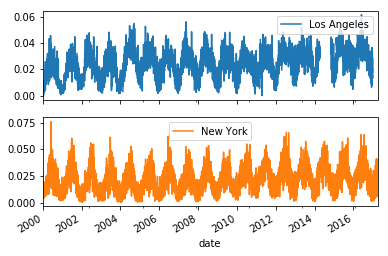

In [86]:
# Plot data
df.plot(subplots=True)
plt.show()

In [87]:
yahoo = pd.read_csv("C:/dataset/stock_data/yahoo.csv")
yahoo.head()

,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66


In [92]:
yahoo.set_index('date',inplace=True)

In [96]:
google = pd.read_csv('C:/Dataset/stock_data/google.csv', parse_dates =['Date'],index_col='Date')
google.head()

,Close
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [99]:
google.rename(columns={'Close':'price'},inplace=True)
google.head()

,price
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


In [100]:
google['shifted'] = google.price.shift()  # default period =1
google.head(3)

,price,shifted
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,556.00
2014-01-04,NaN,551.95


In [103]:
google['lagged']=google.price.shift(periods=-1)
google[['price','lagged','shifted']].tail(3)

,price,lagged,shifted
Date,,,
2016-12-28,785.05,782.79,791.55
2016-12-29,782.79,771.82,785.05
2016-12-30,771.82,NaN,782.79


## Calculate one-period percent change

In [106]:
google['change']= google.price.div(google.shifted) # $s_t/x_{t-1}$
google[['price','shifted','change']].head(3)

,price,shifted,change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,556.00,0.992716
2014-01-04,NaN,551.95,NaN


In [107]:
google['return']=google.change.sub(1).mul(100)
google[['price','shifted','change','return']].head(3)

,price,shifted,change,return
Date,,,,
2014-01-02,556.00,NaN,NaN,NaN
2014-01-03,551.95,556.00,0.992716,-0.728417
2014-01-04,NaN,551.95,NaN,NaN


### Alternatice, 
builtin function with .diff() and pct_change()

In [109]:
# difference in value for two adjacent periods
google['diff'] =google.price.diff()
google[['price','diff']].head(3)

,price,diff
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,-4.05
2014-01-04,NaN,NaN


In [111]:
google['pct_change'] = google.price.pct_change().mul(100)
google[['price','return','pct_change']].head(3)

,price,return,pct_change
Date,,,
2014-01-02,556.00,NaN,NaN
2014-01-03,551.95,-0.728417,-0.728417
2014-01-04,NaN,NaN,NaN


**  multiple period return **

In [113]:
google['return_3d'] = google.price.pct_change(3).mul(100)
google[['price','return_3d']].head()

,price,return_3d
Date,,
2014-01-02,556.00,NaN
2014-01-03,551.95,NaN
2014-01-04,NaN,NaN
2014-01-05,NaN,NaN
2014-01-06,558.10,1.114231


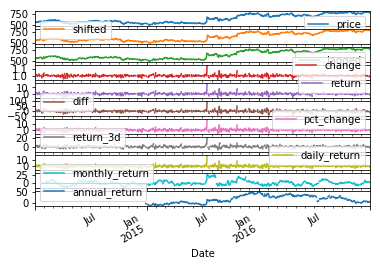

In [115]:
# Create daily_return
google['daily_return'] = google.price.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.price.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.price.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()


### Compare time series growth rates
Comparing stock performance   
•	Stock price series: hard to compare at difference levels   
•	Simple solution: normalize price series to start at 100   
•	Divide all prices by first in series,muliple by 100   
    *	Same starting point     
    *	All price relative to starting point      
    *	Difference to starting point in percentage points   

In [122]:
google =pd.read_csv('C:/Dataset/stock_data/google.csv',parse_dates=['Date'],index_col='Date')
google.rename(columns={'Close':'price'},inplace=True)
google.head()

,price
Date,
2014-01-02,556.00
2014-01-03,551.95
2014-01-04,NaN
2014-01-05,NaN
2014-01-06,558.10


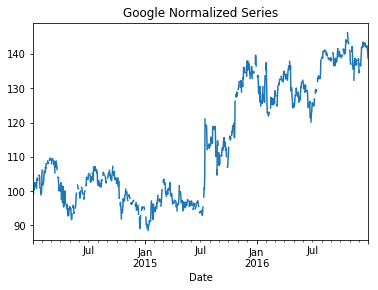

In [123]:
first_price =google.price.iloc[0]  # alternative, first_price= google.loc['2014-01-02','price']
normalized =google.price.div(first_price ).mul(100)
normalized.plot(title='Google Normalized Series')

### Normalize multiple series

In [ ]:
# Compare the performance of several asset classes. let's compare four key assets: stocks, bonds, gold, and oil.



## Downsampling & aggregation
Downsampling can be used to sampling from hour to day, day to month where the output is computed by median, mean, last value. 

In [4]:
ozone = pd.read_csv("C:/Dataset/air_quality/ozone_nyc.csv", parse_dates=["date"],index_col="date")
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB


In [5]:
ozone=ozone.resample('D').asfreq()
ozone.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB


In [6]:
ozone.head()

,Ozone
date,
2000-01-01,0.004032
2000-01-02,0.009486
2000-01-03,0.005580
2000-01-04,0.008717
2000-01-05,0.013754


** Downsampling: ** .resample().mean(): monthly average, assigned to end of calendar month

In [7]:
ozone.resample('M').mean().head()

,Ozone
date,
2000-01-31,0.010443
2000-02-29,0.011817
2000-03-31,0.016810
2000-04-30,0.019413
2000-05-31,0.026535


In [9]:
ozone.resample('M').median().head()

,Ozone
date,
2000-01-31,0.009486
2000-02-29,0.010726
2000-03-31,0.017004
2000-04-30,0.019866
2000-05-31,0.026018


Alternative, applying multiple operations

In [10]:
ozone.resample('M').agg(['mean','std']).head()

Ozone          
                mean       std
date                          
2000-01-31  0.010443  0.004755
2000-02-29  0.011817  0.004072
2000-03-31  0.016810  0.004977
2000-04-30  0.019413  0.006574
2000-05-31  0.026535  0.008409

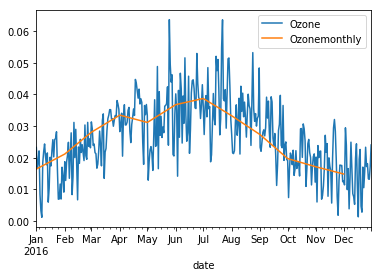

In [12]:
ozone = ozone.loc['2016']
ax= ozone.plot()
monthly = ozone.resample('M').mean()
monthly.add_suffix('monthly').plot(ax=ax)

### Compare weekly, monthly and annual ozone trends for NYC & LA
you'll apply this new skill to ozone data for both NYC and LA since 2000 to compare the air quality trend at weekly, monthly and annual frequencies and explore how different resampling periods impact the visualization.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 2 columns):
Los Angeles    5488 non-null float64
New York       6167 non-null float64
dtypes: float64(2)
memory usage: 147.4 KB
None


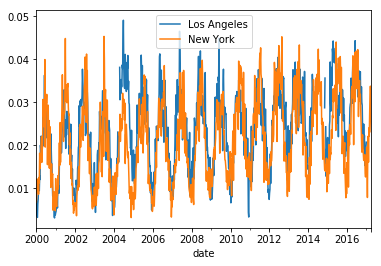

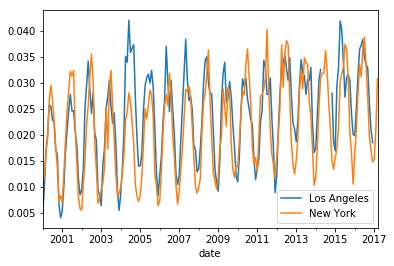

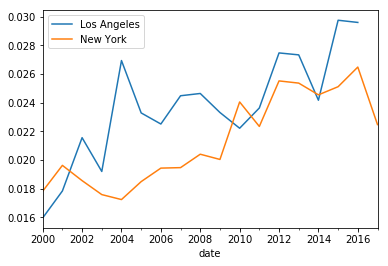

In [14]:
# Import and inspect data here
ozone = pd.read_csv('C:/Dataset/air_quality/ozone_nyla.csv',parse_dates=['date'],index_col='date')
print(ozone.info())
plt.show()
# Calculate and plot the weekly average ozone trend
ozone.resample('W').mean().plot()
plt.show()

# Calculate and plot the monthly average ozone trend
ozone.resample('M').mean().plot()

# Calculate and plot the annual average ozone trend
ozone.resample('A').mean().plot()
plt.show()



### Comparing google and Facebook stock data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 504 entries, 2015-01-02 to 2016-12-30
Data columns (total 2 columns):
FB      504 non-null float64
GOOG    504 non-null float64
dtypes: float64(2)
memory usage: 11.8 KB
None


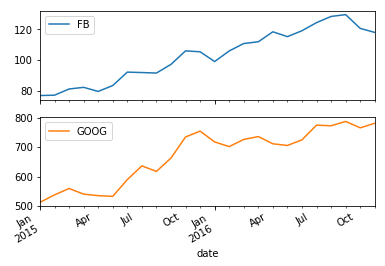

In [15]:
# Import and inspect data here
stocks = pd.read_csv('c:/dataset/stock_data/goog_fb.csv',parse_dates=['date'],index_col='date')
print(stocks.info())

# Calculate and plot the monthly averages
monthly_average = stocks.resample('M').mean()
monthly_average.plot(subplots=True)
plt.show()


## Compare quarterly GDP growth rate and stock returns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 41 entries, 2007-01-01 to 2017-01-01
Data columns (total 1 columns):
gdp_growth    41 non-null float64
dtypes: float64(1)
memory usage: 656.0 bytes
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2610 entries, 2007-06-29 to 2017-06-29
Data columns (total 1 columns):
djia    2519 non-null float64
dtypes: float64(1)
memory usage: 40.8 KB
None


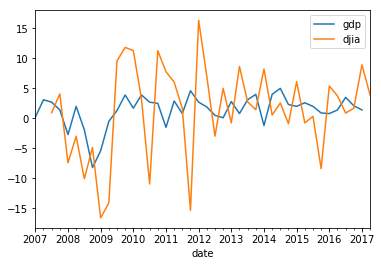

In [16]:
# Import and inspect gdp_growth here
gdp_growth = pd.read_csv('c:/dataset/stock_data/gdp_growth.csv',parse_dates=['date'],index_col='date')
print(gdp_growth.info())

# Import and inspect djia here
djia = pd.read_csv('c:/dataset/stock_data/djia.csv',parse_dates=['date'],index_col='date')
print(djia.info())

# Calculate djia quarterly returns here 
djia_quarterly = djia.resample('QS').first()
djia_quarterly_return = djia_quarterly.pct_change().mul(100)

# Concatenate, rename and plot djia_quarterly_return and gdp_growth here 
data = pd.concat([gdp_growth,djia_quarterly_return], axis=1)
data.columns=['gdp','djia']
data.plot()
plt.show()


## Visualize monthly mean, median and standard deviation of S&P500 returns

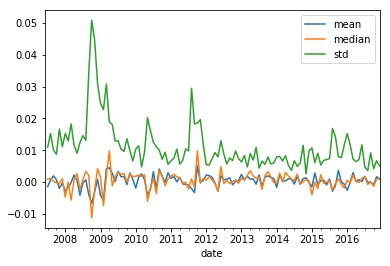

In [18]:
# Import data here
sp500 = pd.read_csv('c:/dataset/stock_data/sp500.csv', parse_dates=['date'], index_col='date')

# Calculate daily returns here
daily_returns = sp500.squeeze().pct_change()

# Resample and calculate statistics
stats = daily_returns.resample('M').agg(['mean', 'median', 'std'])

# Plot stats here
stats.plot()
plt.show()


## Rolling average air quality since 2010 for new york city
To practice the rolling , you'll start with air quality trends for New York City since 2010. In particular, you'll be using the daily Ozone concentration levels provided by the Environmental Protection Agency to calculate & plot the 90 and 360 day rolling average.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6291 entries, 2000-01-01 to 2017-03-31
Data columns (total 1 columns):
Ozone    6167 non-null float64
dtypes: float64(1)
memory usage: 98.3 KB
None


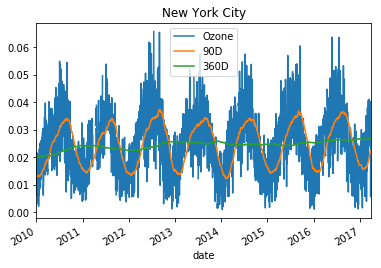

In [19]:
# Import and inspect ozone data here

data = pd.read_csv('c:/dataset/air_quality/ozone_nyc.csv',parse_dates=['date'],index_col='date')
print(data.info())

# Calculate 90d and 360d rolling mean for the last price
data['90D'] = data.Ozone.rolling('90D').mean()
data['360D'] = data.Ozone.rolling('360D').mean()

# Plot data
data['2010':].plot(title='New York City')
plt.show()

Do the different rolling windows help you see any long term trends that are hard to spot in the original data?

## Rolling 360-day median & std. deviation for nyc ozone data since 2000

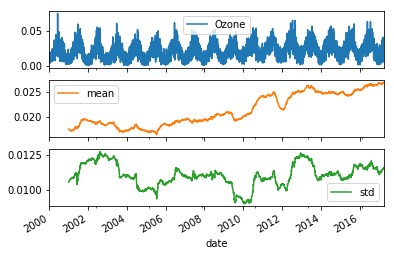

In [22]:
# Import and inspect ozone data here
data = pd.read_csv('c:/dataset/air_quality/ozone_nyc.csv',parse_dates=['date'],index_col='date').dropna()
# Calculate the rolling mean and std here
rolling_stats = data.Ozone.rolling(360).agg(['mean', 'std'])

# Join rolling_stats with ozone data
stats = data.join(rolling_stats)

# Plot stats
stats.plot(subplots=True)
plt.show()



## Rolling quantiles for daily air quality in nyc

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6300 entries, 2000-01-01 to 2017-03-31
Freq: D
Data columns (total 1 columns):
Ozone    6300 non-null float64
dtypes: float64(1)
memory usage: 98.4 KB
None


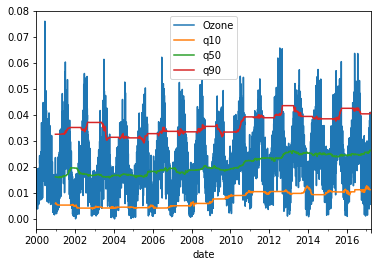

In [23]:
# Resample, interpolate and inspect ozone data here
data = data.resample('D').interpolate()
print(data.info())

# Create the rolling window
rolling = data.rolling(360)['Ozone']

# Insert the rolling quantiles to the monthly returns
data['q10'] = rolling.quantile(0.1)
data['q50'] = rolling.quantile(0.5)
data['q90'] = rolling.quantile(0.9)

# Plot monthly returns
data.plot()
plt.show()

## Expanding window functions with pandas
From rolling to expanding windows
    Calculate metrics for periods up to current date
    New time series reflects all historical values
    Usefule for running rate of return, running min/max

Two options with pandas    
      ** .expanding() ** -just like .rolling   
      ** .cumsum(), .cumprod(), cumin()/max()**   


In [30]:
data = pd.read_csv('c:/dataset/stock_data/sp500.csv',parse_dates=['date'],index_col='date')
pr = data.SP500.pct_change()    

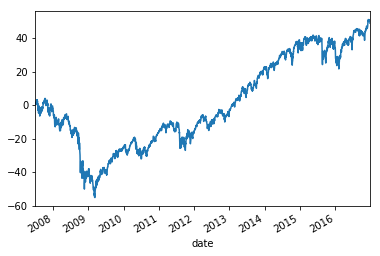

In [31]:
pr_plus_one = pr.add(1)
cumulative_return = pr_plus_one.cumprod().sub(1)
cumulative_return.mul(100).plot()

In [32]:
# Calculate differences
differences = data.diff().dropna()

# Select start price
start_price = data.first('D')

# Calculate cumulative sum
cumulative_sum = start_price.append(differences).cumsum()


In [33]:
# Validate cumulative sum equals data
print(data.equals(cumulative_sum))

True


## Cumulative return on $1,000 invested in google vs apple I   

Let's compare how much $1,000 would be worth if invested in Google ('GOOG') or Apple ('AAPL') in 2010

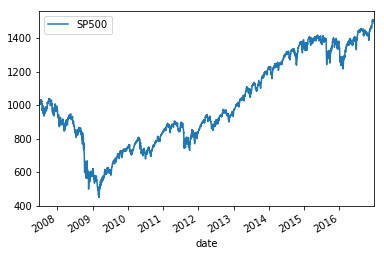

In [34]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = data.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns + 1
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment) .plot()

plt.show()

## Cumulative return on $1,000 invested in google vs apple II   
Apple outperformed Google over the entire period, but this may have been different over various 1-year sub periods, so that switching between the two stocks might have yielded an even better result.   

To analyze this, calculate that cumulative return for rolling 1-year periods, and then plot the returns to see when each stock was superior.

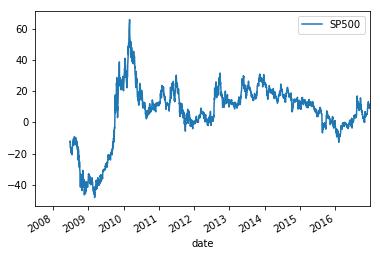

In [35]:
# Import numpy
import numpy as np

# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) -1
    
# Calculate daily returns
daily_returns = data.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot();
plt.show()


## Case study: S&P500 price simulation

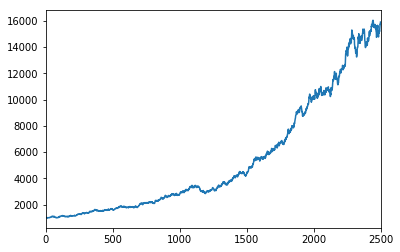

In [37]:
from numpy.random import normal
# Set seed here
seed = 42

# Create random_walk
random_walk = normal(loc=.001, scale=0.01, size=2500)

# Convert random_walk to pd.series
random_walk = pd.Series(random_walk)

# Create random_prices
random_prices = random_walk.add(1).cumprod()

# Plot random_prices here
random_prices.mul(1000).plot()
plt.show()

## Random walk II   
In this exercise, you'll build a random walk using historical returns from Facebook's stock price since IPO through the end of May 31, 2017. Then you'll simulate an alternative random price path in the next exercise.